<a href="https://colab.research.google.com/github/Nadyaulia/Capstone/blob/main/deploy/Capstone4_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROSES EDA**

# **Import Library**

In [1]:
import pandas as pd #manipulasi dan analisis data
import numpy as np
import seaborn as sns # visualisasi data
import matplotlib.pyplot as plt # visualisasi data

# **Load Dataset**

In [2]:
df = pd.read_csv('/content/ObesityDataSet.csv')
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
#menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

# **Informasi Dataset**

In [4]:
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

Jumlah Baris: 2111
Jumlah Kolom: 17


In [5]:
# Konversi ke numerik
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
#menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF                             20

# **Cek missing values**

In [7]:
print(df.isnull().sum())

Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


# **Cek nilai unik per kolom**

In [8]:
print("Unique values per column:")
print(df.nunique())

Unique values per column:
Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


# **Cek data duplikat**

In [9]:
print(df.duplicated().sum())

18


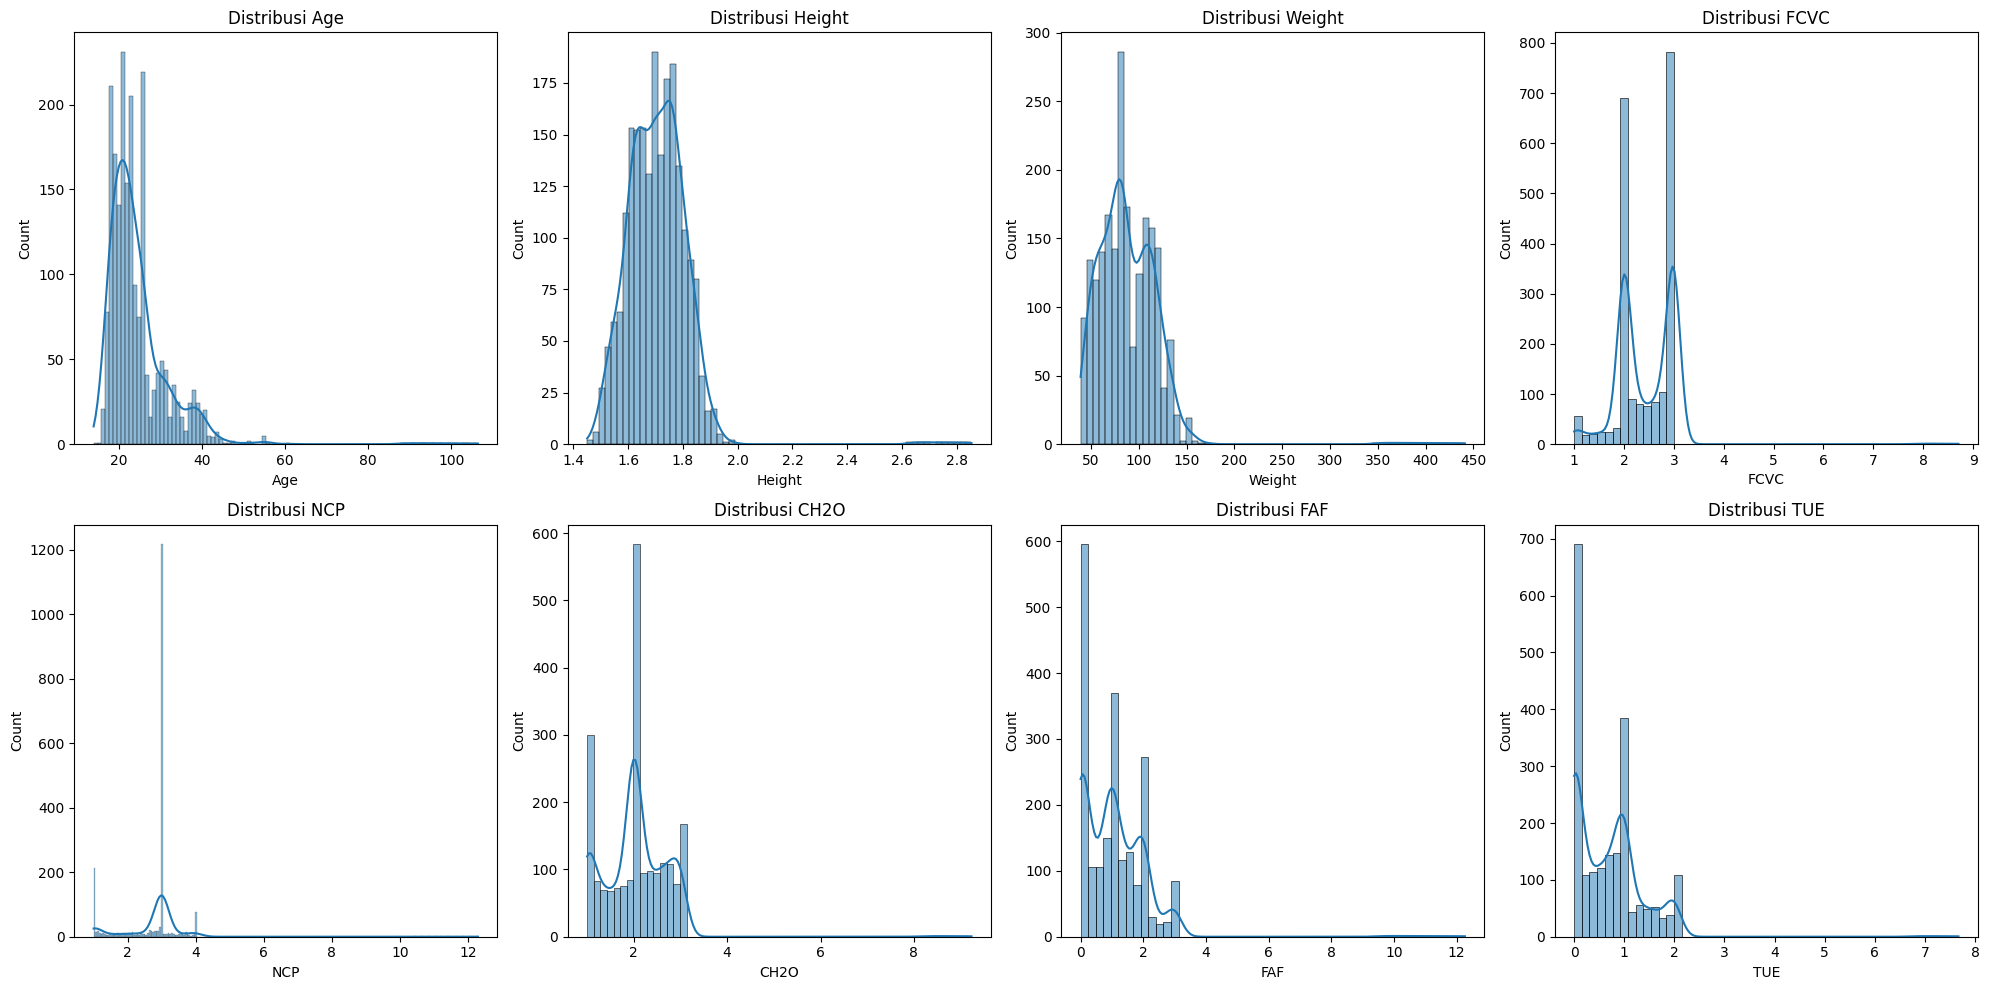

In [10]:
# Histogram
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

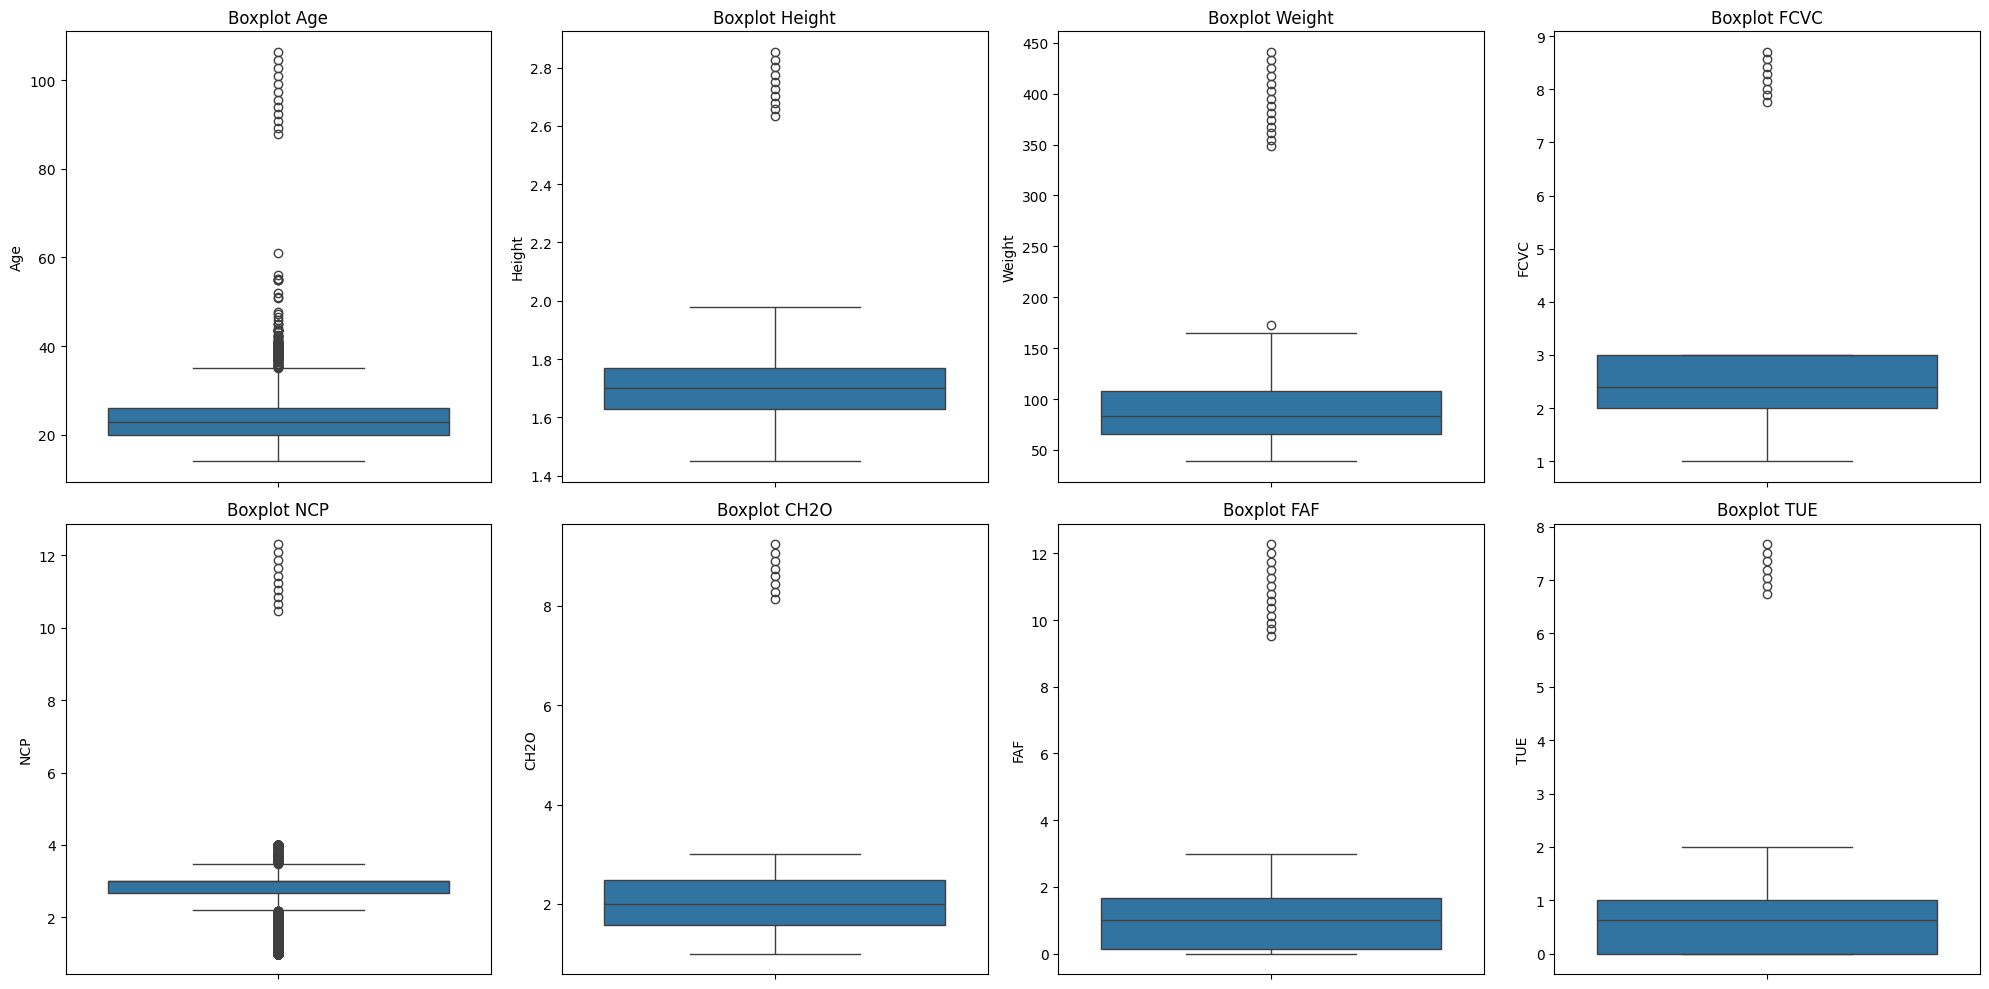

In [11]:
# Boxplot
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

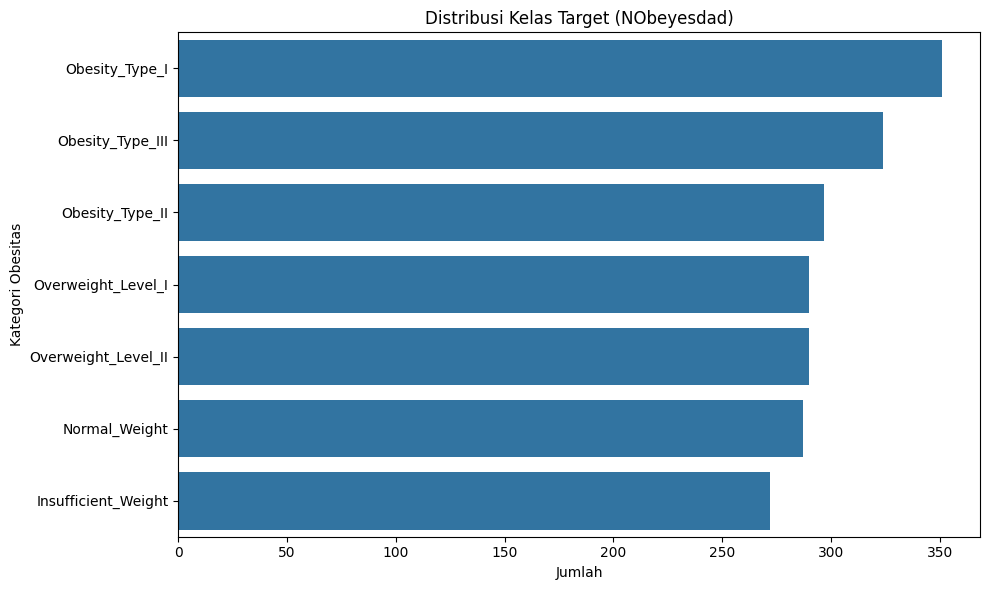

In [12]:
# Distribusi kelas target
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.xlabel('Jumlah')
plt.ylabel('Kategori Obesitas')
plt.tight_layout()
plt.show()

### Kesimpulan EDA
- Dataset terdiri dari 17 fitur dan 2111 baris awal.
- Terdapat missing values dan duplikasi
- Data bersifat campuran antara numerik dan kategorikal.
- Ditemukan beberapa outlier
- Kelas target (`NObeyesdad`) sedikit tidak seimbang.
- Visualisasi menunjukkan variasi data yang baik untuk dilanjutkan ke modeling.


# **PROSES PREPOCESSING DATA**

# **Cek Missing Value**

In [13]:
print(df.isnull().sum())

Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


# **Mengatasi Missing Value**

In [14]:
# Pilih kolom numerik (tipe int/float)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Isi missing value numerik dengan median karena lebih tahan outlier
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)


In [15]:
# Pilih kolom kategorikal (tipe object)
cat_cols = df.select_dtypes(include='object').columns

# Isi missing value kategorikal dengan MODUS
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col]= df[col].fillna(mode_val)

In [16]:
print( df.isnull().sum())

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


# **Data Duplikat**

In [17]:
print(df.duplicated().sum())

19


In [18]:
df = df.drop_duplicates()

In [19]:
print(df.duplicated().sum())

0


## **Outlier**

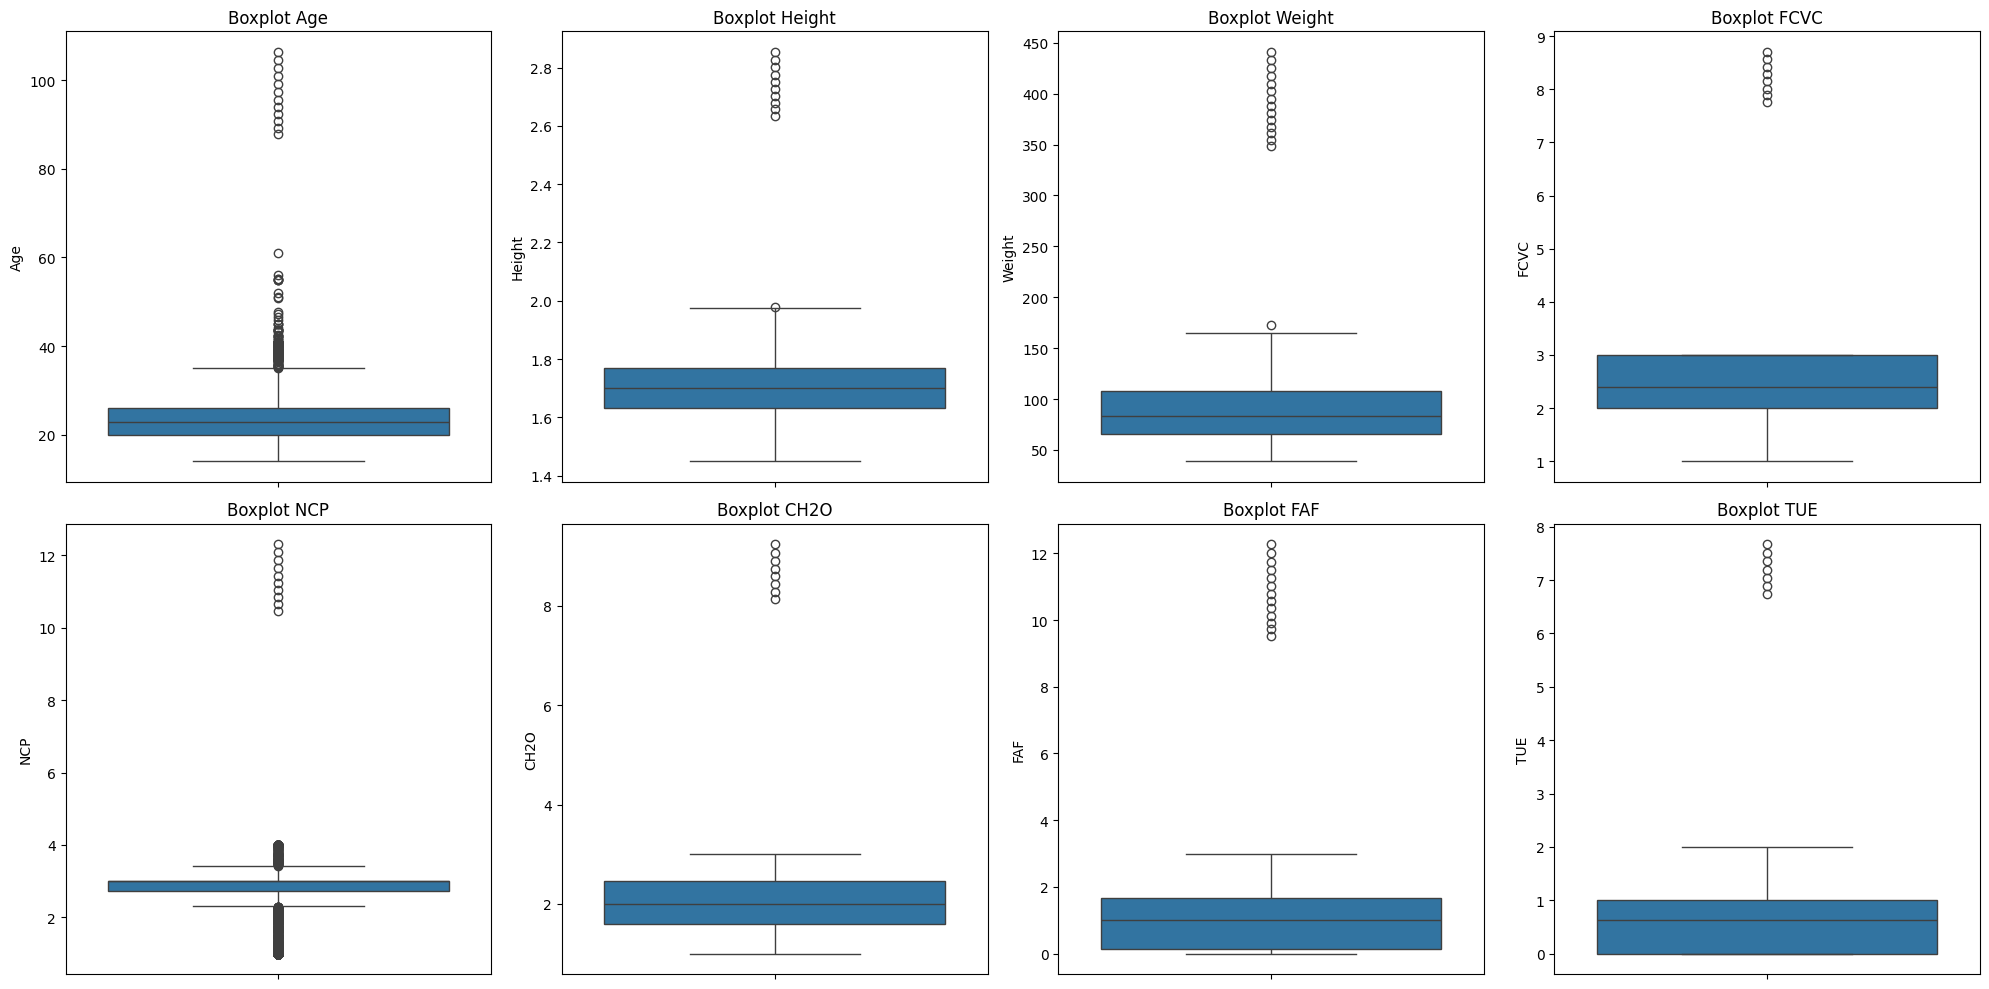

In [20]:
# Boxplot
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [21]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_before_cleaning = df.copy()

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

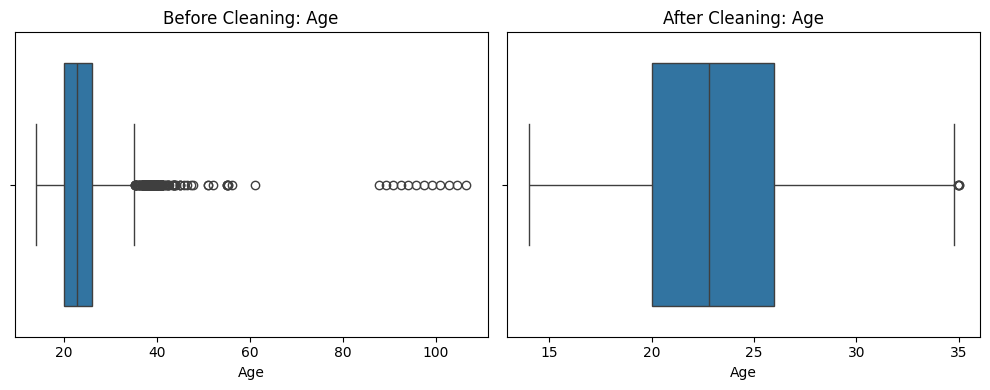

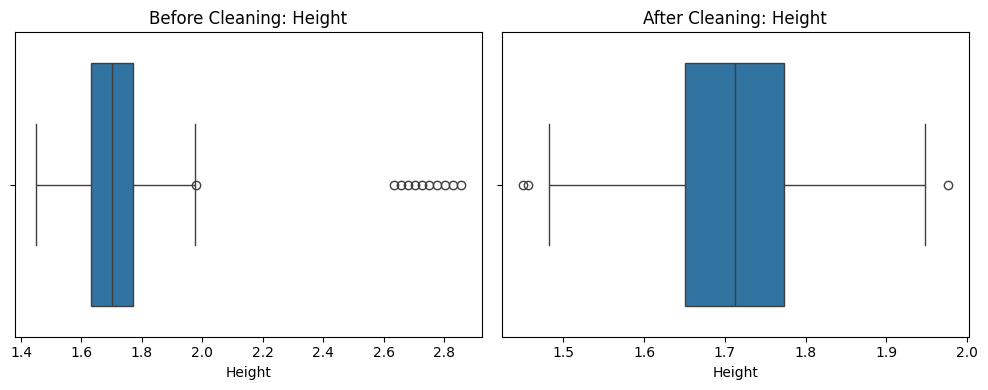

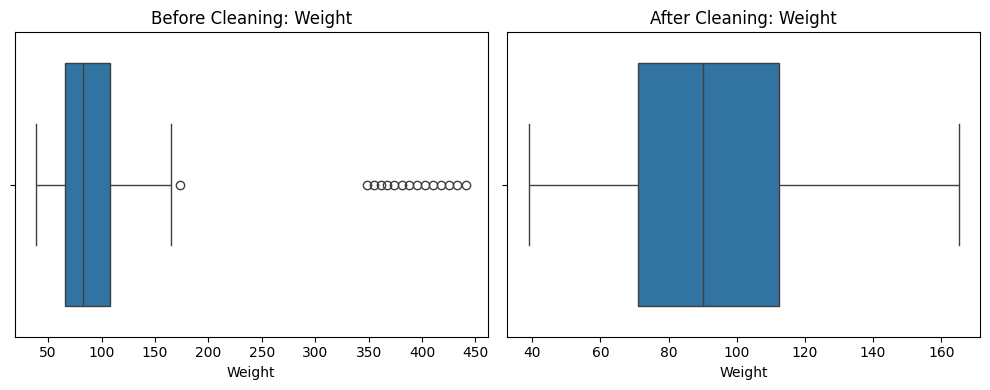

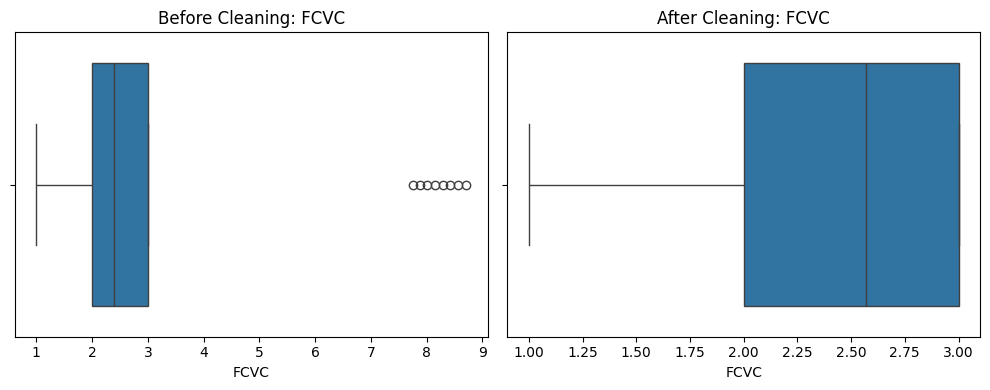

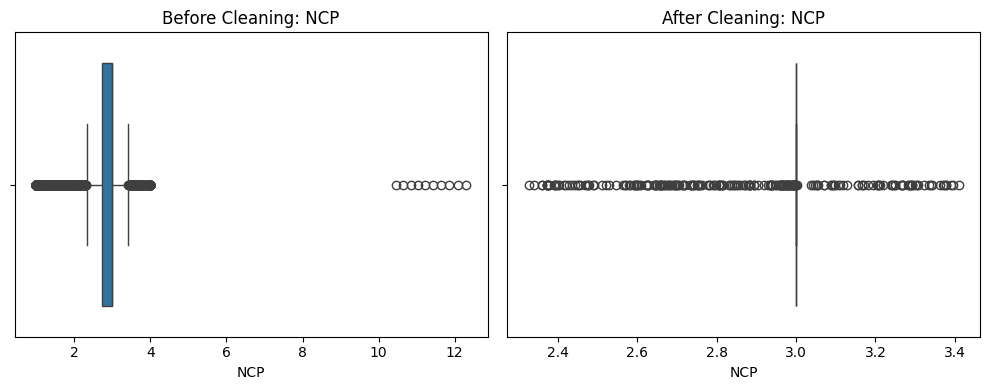

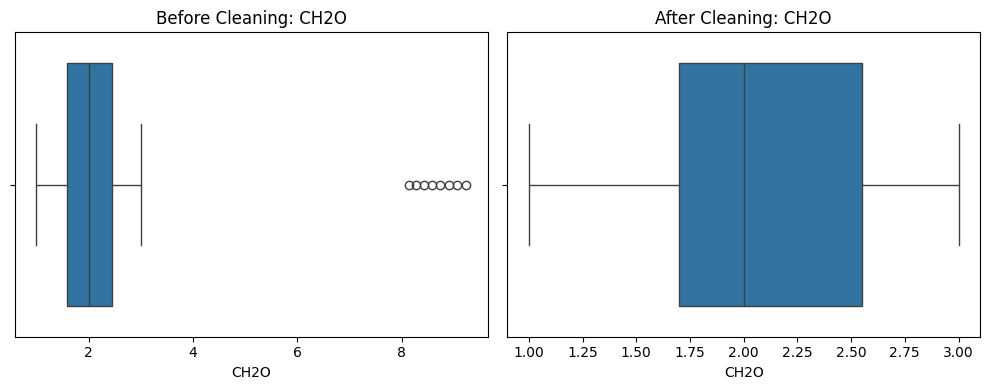

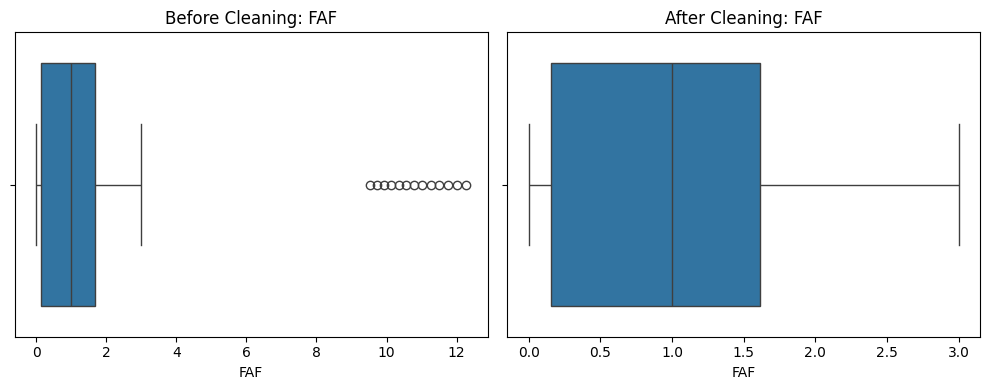

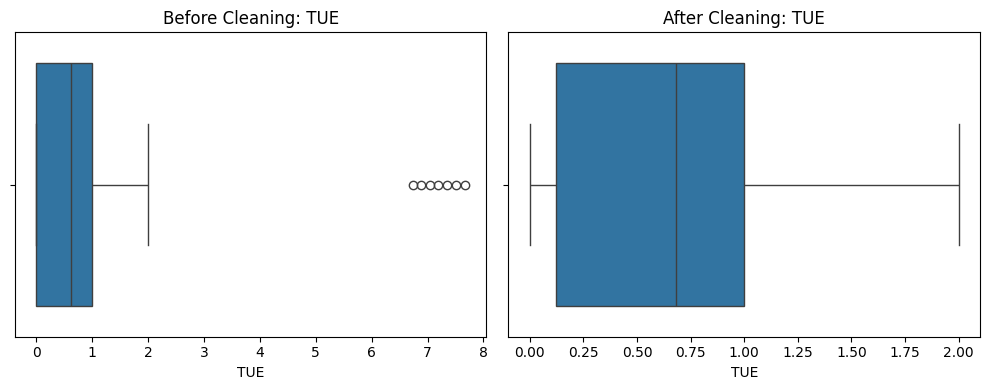

In [22]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Use the original DataFrame for the 'Before Cleaning' plot
    sns.boxplot(x=df_before_cleaning[col], ax=axes[0])
    axes[0].set_title(f"Before Cleaning: {col}")
    # Use the DataFrame after outlier removal for the 'After Cleaning' plot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"After Cleaning: {col}")
    plt.tight_layout()
    plt.show()

# **Ubah data kategori ke numerik**

In [23]:
from sklearn.preprocessing import LabelEncoder

# Salin dataset
df_encoded = df.copy()

# Pilih kolom kategorikal (object)
cat_cols = df_encoded.select_dtypes(include='object').columns
print("Kolom kategorikal:", list(cat_cols))

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Lakukan label encoding pada setiap kolom kategorikal
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


Kolom kategorikal: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']


In [24]:
print(df_encoded.head())

    Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       1    1.62    64.0     3     1   2.0  3.0    1      1   2.0   
1  21.0       1    1.52    56.0     2     1   3.0  3.0    2      2   3.0   
2  23.0       2    1.80    77.0     1     1   2.0  3.0    1      1   2.0   
3  27.0       2    1.80    87.0     1     1   3.0  3.0    1      1   2.0   
5  29.0       2    1.62    53.0     2     2   2.0  3.0    1      1   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               2  0.0  1.0     3       4           1  
1                               2  3.0  0.0     3       4           1  
2                               2  2.0  1.0     3       4           1  
3                               1  2.0  0.0     3       5           5  
5                               1  0.0  0.0     3       1           1  


# **Fitur yg digunakan**

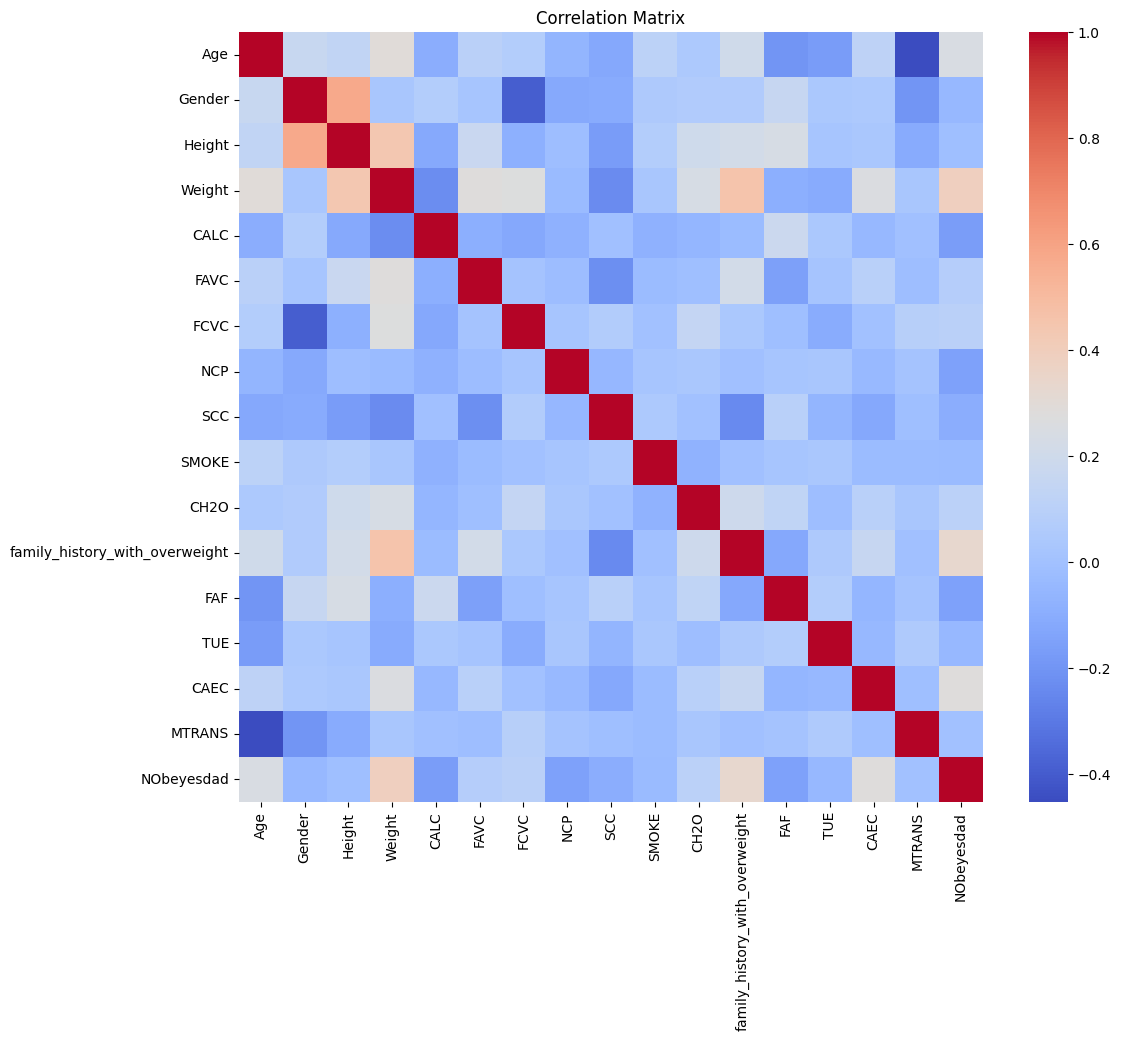

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi korelasi fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


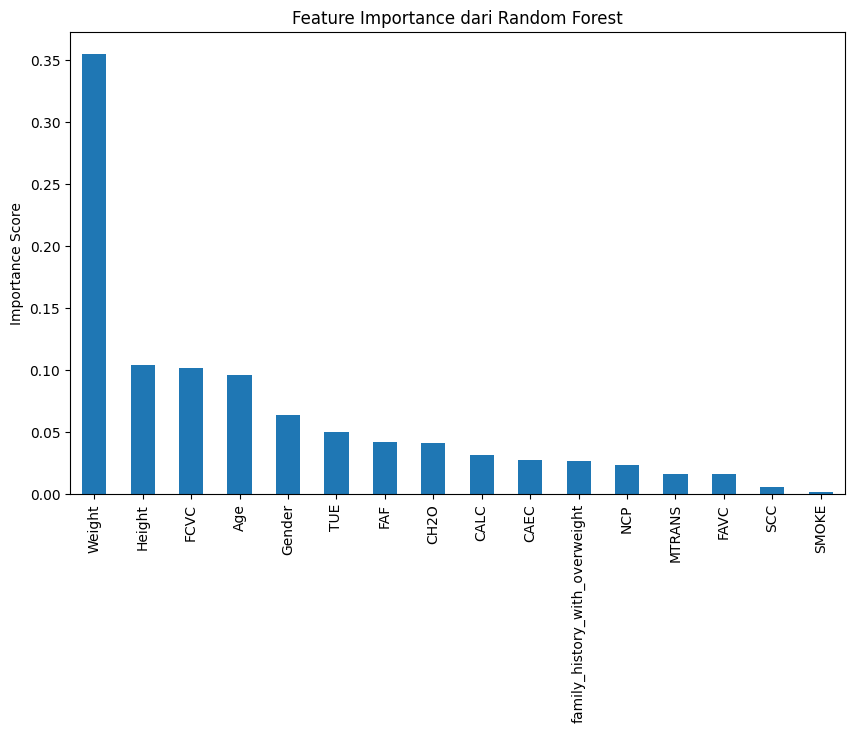

In [26]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Ambil dan tampilkan pentingnya tiap fitur
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Feature Importance dari Random Forest")
plt.ylabel("Importance Score")
plt.show()


# **Ketidakseimbangan Data**

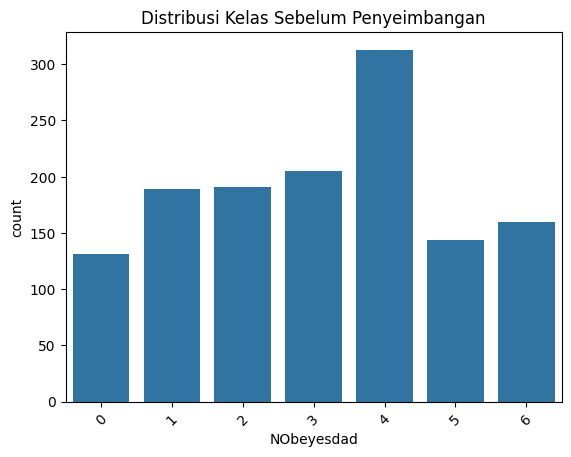

In [27]:
sns.countplot(x=df_encoded["NObeyesdad"])
plt.title("Distribusi Kelas Sebelum Penyeimbangan")
plt.xticks(rotation=45)
plt.show()


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]

# Split data agar tidak terjadi data leakage
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Misal dataset Anda adalah X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Terapkan SMOTE hanya ke data latih
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("sebelum SMOTE:", y.value_counts())
print("sesudah SMOTE:", pd.Series(y_resampled).value_counts())




sebelum SMOTE: NObeyesdad
4    313
3    205
2    191
1    189
6    160
5    144
0    131
Name: count, dtype: int64
sesudah SMOTE: NObeyesdad
4    250
0    250
3    250
1    250
2    250
5    250
6    250
Name: count, dtype: int64


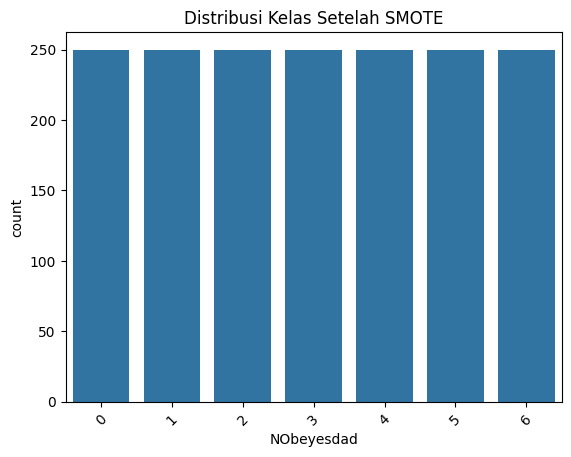

In [29]:
# Cek hasil distribusi setelah SMOTE
sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()

# **Normalisasi**

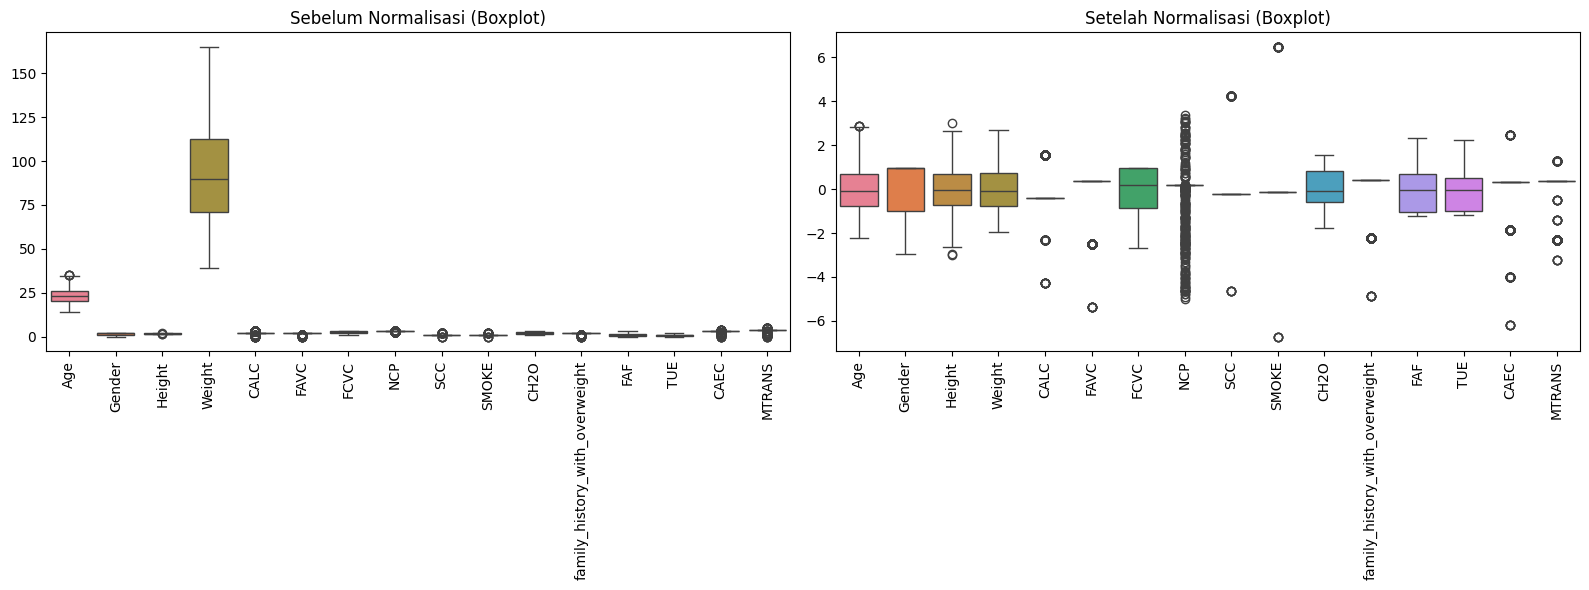

In [30]:
from sklearn.preprocessing import StandardScaler

# Fitur dan target
X = df_encoded.drop("NObeyesdad", axis=1)
y = df_encoded["NObeyesdad"]

# Salin sebelum normalisasi
X_before = X.copy()

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_after = pd.DataFrame(X_scaled, columns=X.columns)

# Visualisasi Boxplot
plt.figure(figsize=(16, 6))

# Sebelum normalisasi
plt.subplot(1, 2, 1)
sns.boxplot(data=X_before)
plt.title("Sebelum Normalisasi (Boxplot)")
plt.xticks(rotation=90)

# Setelah normalisasi
plt.subplot(1, 2, 2)
sns.boxplot(data=X_after)
plt.title("Setelah Normalisasi (Boxplot)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# **Kesimpulan Prepocessing**

*  Missing values pada fitur numerik diisi dengan median, sedangkan fitur kategorikal diisi dengan modus.
*  Data duplikat berhasil dihapus.
*  Fitur kategorikal telah diencoding dengan LabelEncoder.
*  SMOTE diterapkan untuk mengatasi ketidakseimbangan kelas.
*  Fitur numerik dinormalisasi menggunakan StandardScaler.
*  Data siap digunakan untuk proses modeling.





# **PROSES PEMODELAN DAN EVALUASI**

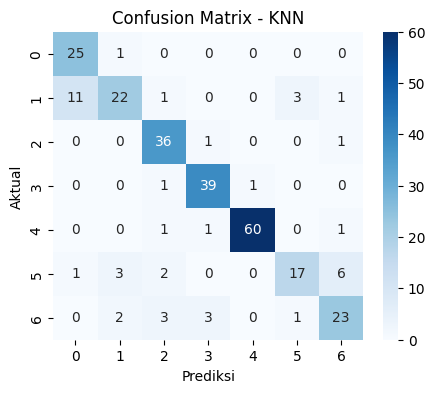

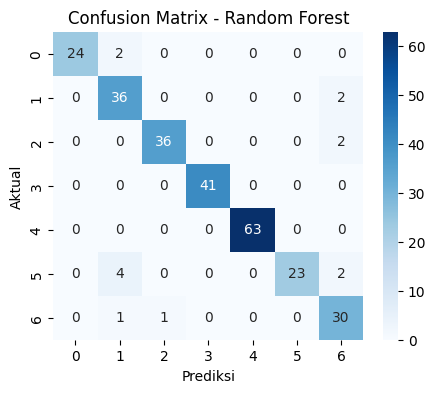

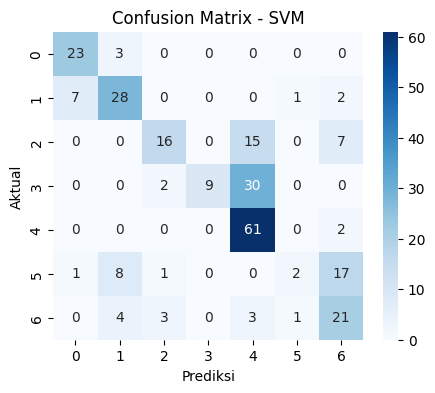

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inisialisasi model
models = {
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

results = []

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([name, acc, prec, rec, f1])

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

In [32]:
# Tabel dan visualisasi hasil
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.831461,0.836329,0.831461,0.826387
1,Random Forest,0.947566,0.953010,0.947566,0.947966
2,SVM,0.599251,0.659708,0.599251,0.550841


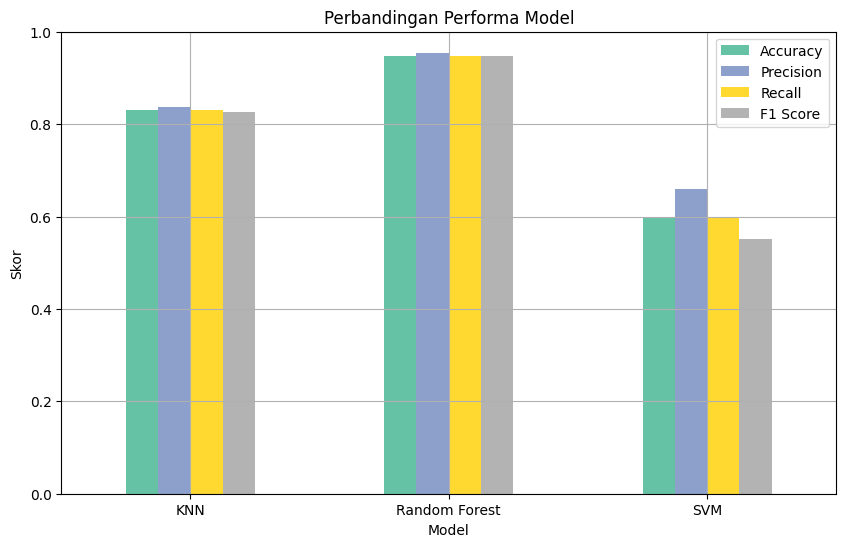

In [33]:
# Bar plot perbandingan performa
results_df.set_index('Model').plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# **Kesimpulan Model dan Evaluasi**



Pada tahap ini telah dilakukan pemodelan klasifikasi menggunakan tiga algoritma berbeda, yaitu:
- **KNN**
- **Random Forest Classifier**
- **Support Vector Machine (SVM)**

Masing-masing model dilatih menggunakan data yang telah melalui proses preprocessing dan kemudian diuji performanya dengan metrik evaluasi berikut:
- **Akurasi**
- **Presisi**
- **Recall**
- **F1-Score**
- **Confusion Matrix**

Hasil evaluasi menunjukkan bahwa:
- Model **Random Forest** memberikan performa terbaik secara keseluruhan, dengan skor akurasi dan F1-score yang paling tinggi.
- Model **KNN** menunjukkan performa yang baik namun tidak sebaik Random Forest dalam mendeteksi semua kelas.
- Model **SVM** memberikan hasil yang stabil, namun sedikit lebih rendah dalam metrik recall, yang berarti cenderung kurang optimal dalam mengenali kelas minoritas.

Dari visualisasi perbandingan performa model, terlihat jelas bahwa **Random Forest adalah model yang paling unggul**, sehingga direkomendasikan untuk digunakan dalam kasus klasifikasi ini.

Kesimpulannya, pemodelan berhasil dilakukan dan memberikan hasil evaluasi yang cukup baik, dengan Random Forest sebagai model terbaik berdasarkan metrik yang digunakan.


# **PROSES HYPERPARAMETER TURNING**

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'random_state': [42]
}

# Inisialisasi model
rf = RandomForestClassifier()

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}


Accuracy after tuning: 0.9588014981273408
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.84      0.97      0.90        38
           2       0.97      0.95      0.96        38
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        63
           5       1.00      0.86      0.93        29
           6       0.91      0.94      0.92        32

    accuracy                           0.96       267
   macro avg       0.96      0.95      0.95       267
weighted avg       0.96      0.96      0.96       267



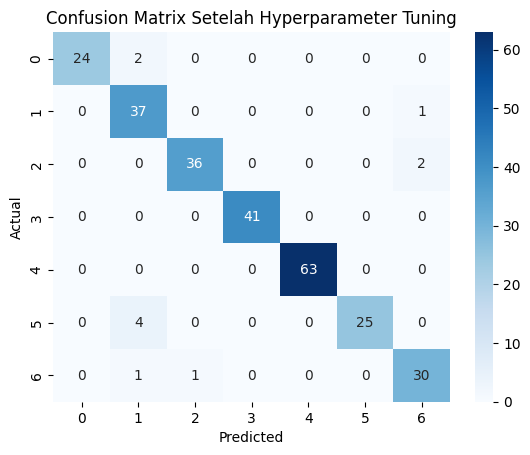

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi dengan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi
print("Accuracy after tuning:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Setelah Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

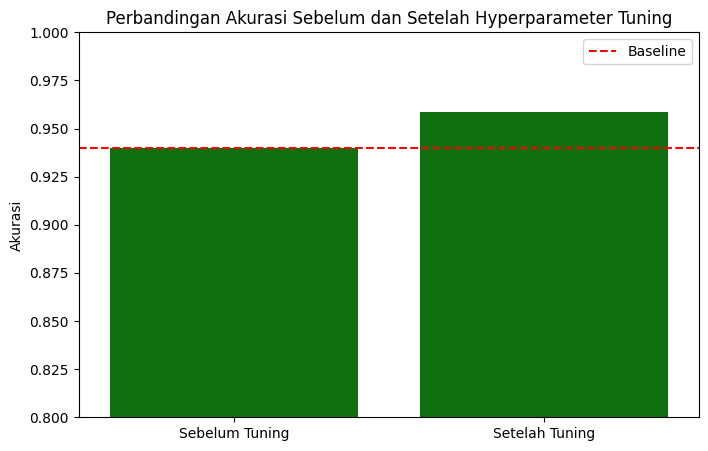

In [37]:
accuracy_before_tuning = 0.94  # Ganti nilai ini dengan akurasi sebelumnya

# Akurasi setelah tuning
accuracy_after_tuning = accuracy_score(y_test, y_pred)

# Visualisasi
labels = ['Sebelum Tuning', 'Setelah Tuning']
acc_values = [accuracy_before_tuning, accuracy_after_tuning]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=acc_values, color="green")
plt.ylim(0.8, 1.0)
plt.title("Perbandingan Akurasi Sebelum dan Setelah Hyperparameter Tuning")
plt.ylabel("Akurasi")
plt.axhline(y=accuracy_before_tuning, color='r', linestyle='--', label='Baseline')
plt.legend()
plt.show()

# **Kesimpulan Hyperparameter Tuning**

Dengan penerapan hyperparameter tuning menggunakan GridSearchCV , model Random Forest mengalami peningkatan akurasi dari 94% menjadi 96%.
Peningkatan ini menunjukkan bahwa pemilihan parameter yang tepat dapat meningkatkan kemampuan generalisasi model.
Model lebih stabil dan tidak cenderung overfitting berkat pengaturan max_depth, min_samples_split, dan jumlah n_estimators yang optimal.
Hasil tuning memperlihatkan bahwa model yang disetel secara otomatis memberikan performa yang lebih baik dibandingkan dengan model default .

In [38]:
import joblib

# Simpan model terbaik
joblib.dump(best_model, 'obesity_model.pkl')

# Simpan scaler jika digunakan saat training
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [42]:
import joblib

# Load the model using joblib
with open('obesity_model.pkl', 'rb') as f:
    data = joblib.load(f)

# Alternatively, joblib.load can directly take the filename
# data = joblib.load('obesity_model.pkl')

print("Model loaded successfully!")
# You can now use the loaded model, which is stored in the 'data' variable.
# For example, to make predictions:
# predictions = data.predict(your_new_data)

Model loaded successfully!


In [43]:
import joblib

# Load the model using joblib
with open('scaler.pkl', 'rb') as f:
    data = joblib.load(f)

# Alternatively, joblib.load can directly take the filename
# data = joblib.load('obesity_model.pkl')

print("Model loaded successfully!")
# You can now use the loaded model, which is stored in the 'data' variable.
# For example, to make predictions:
# predictions = data.predict(your_new_data)

Model loaded successfully!
